In [3]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
from src.cleaner import *
pd.options.mode.chained_assignment = None
from sklearn import preprocessing

In [2]:
df=pd.read_csv('data/first_mens_scrape8660.csv')

In [3]:
df=cleaner(df)

In [4]:
item_item=df[['frag rating','main accords','top notes','top notes id','mid notes','mid notes id','base notes','base notes id','user voted notes','close to skin','radiates about arm length','radiates 6ft','fills room','30min to 1hr','1hr to 2hr','3hr to 6hr','7hr to 12hr','greater than 12hr','similiar fragrences by user vote']]

In [5]:
item_item.drop(304,inplace=True)

In [6]:
item_item.describe()

,close to skin,radiates about arm length,radiates 6ft,fills room,30min to 1hr,1hr to 2hr,3hr to 6hr,7hr to 12hr,greater than 12hr
count,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000
mean,9.794279,26.527737,16.509023,10.698436,3.894666,5.150648,16.105601,17.865660,7.736934
std,30.489124,92.099901,62.840761,35.398193,11.096291,15.469252,57.438945,75.970398,40.632121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,7.000000,15.000000,9.000000,8.000000,3.000000,4.000000,9.000000,7.000000,3.000000
max,967.000000,2004.000000,1375.000000,1077.000000,225.000000,397.000000,1196.000000,1558.000000,1266.000000


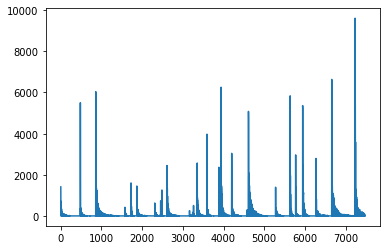

In [7]:
plt.plot(df['have it']);

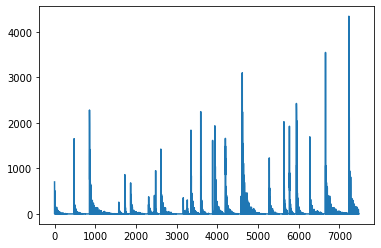

In [8]:
plt.plot(df['want it']);

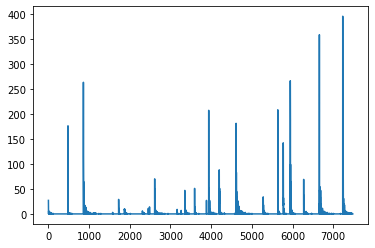

In [9]:
plt.plot(df['signature']);

In [10]:
accords=[]
for i in item_item['main accords']:
    for key in i.keys():
        accords.append(key)

for idx,acc in enumerate(accords):
    if acc == 'Pictures':
        accords.pop(idx)
    if acc == 'Videos':
        accords.pop(idx)

x=set(accords)
accords=list(x)

for accord in accords:
        item_item[accord]=0

In [11]:
for idx,i in enumerate(item_item['main accords']):
     for key,value in i.items():
            if key == 'Pictures':
                continue
            elif key == 'Videos':
                continue
            else:
                item_item[key][idx]=value

In [12]:
item_item.drop(columns='main accords',inplace=True)

In [13]:
all_notes=[]
for notes in item_item['top notes']:
    for note in notes:
        all_notes.append(note)
for notes in item_item['mid notes']:
    for note in notes:
        all_notes.append(note)
for notes in item_item['base notes']:
    for note in notes:
        all_notes.append(note)

In [14]:
an=set(all_notes)
all_notes=list(an)

In [15]:
for note in all_notes:
    item_item[note]=0

In [16]:
top_notes = item_item['top notes']
mid_notes=item_item['mid notes']
base_notes=item_item['base notes']

for idx,notes in enumerate(top_notes):
    for note in notes:
        item_item[note][idx]=1
for idx,notes in enumerate(mid_notes):
    for note in notes:
        item_item[note][idx]=1
for idx,notes in enumerate(base_notes):
    for note in notes:
        item_item[note][idx]=1

In [17]:
item_item.drop(columns=['top notes','mid notes','base notes'], inplace=True)

In [18]:
item_item['winter']=0
item_item['spring']=0
item_item['summer']=0
item_item['autumn']=0
item_item['day']=0
item_item['night']=0
item_item['avg rating']=0
item_item['female love u25']=0
item_item['female love o25']=0
item_item['male love u25']=0
item_item['male love o25']=0
item_item['female like u25']=0
item_item['female like o25']=0
item_item['male like u25']=0
item_item['male like o25']=0
item_item['female dislike u25']=0
item_item['female dislike o25']=0
item_item['male dislike u25']=0
item_item['male dislike o25']=0

for idx,frag in enumerate(item_item['frag rating']):
    for k,v in sorted(frag.items()):
        if k=='clswinter':
            item_item['winter'][idx]= v
        if k=='clsspring':
            item_item['spring'][idx]= v
        if k=='clssummer':
            item_item['summer'][idx]= v
        if k=='clsautumn':
            item_item['autumn'][idx]= v
        if k=='clsday':
            item_item['day'][idx]= v
        if k=='clsnight':
            item_item['night'][idx]= v
        if k=='clslove_female25under':
            item_item['female love u25'][idx]= v
        if k=='clslove_male25under':
            item_item['male love u25'][idx]= v
        if k=='clslove_female25older':
            item_item['female love o25'][idx]= v
        if k=='clslove_male25older':
            item_item['male love o25'][idx]= v
        if k=='clslike_female25under':
            item_item['female like u25'][idx]= v
        if k=='clslike_male25under':
            item_item['male like u25'][idx]= v
        if k=='clslike_female25older':
            item_item['female like o25'][idx]= v
        if k=='clslike_male25older':
            item_item['male like o25'][idx]= v
        if k=='clsdislike_female25under':
            item_item['female dislike u25'][idx]= v
        if k=='clsdislike_male25under':
            item_item['male dislike u25'][idx]= v
        if k=='clsdislike_female25older':
            item_item['female dislike o25'][idx]= v
        if k=='clsdislike_male25older':
            item_item['male dislike o25'][idx]= v
        if k=='average_rating':
            item_item['avg rating'].iloc[idx]=float(v)

In [19]:
item_item.drop(columns='frag rating',inplace=True)

In [20]:
# item_item['avg rating']=0
# for idx,frag in enumerate(item_item['frag rating']):
#     for k,v in sorted(frag.items()):
#         if k=='average_rating':
#             item_item['avg rating'].iloc[idx]=float(v)

In [21]:
item_item=item_item.drop(columns=['top notes id','mid notes id','base notes id','user voted notes'])

In [23]:
project_df=item_item[['close to skin','radiates about arm length','radiates 6ft','fills room']]

In [30]:
normalized_X = preprocessing.normalize(project_df)

In [107]:
normalized_X

array([[0.25292378, 0.8797349 , 0.33723171, 0.21993372],
       [0.19859277, 0.70610763, 0.53840707, 0.41483823],
       [0.16469337, 0.94565871, 0.2496964 , 0.12750454],
       ...,
       [0.09284767, 0.83562902, 0.46423835, 0.27854301],
       [0.11995203, 0.17992804, 0.95961623, 0.17992804],
       [0.69748583, 0.58123819, 0.23249528, 0.34874292]])

In [39]:
project_df['name']=df['name']

In [36]:
df.drop(304,inplace=True)

In [73]:
ratings=item_item[['avg rating','female love u25','female love o25','male love u25','male love o25','female like u25','female like o25','male like u25','male like o25','female dislike u25','female dislike o25','male dislike u25','male dislike o25']]

In [46]:
project_df['stay on skin']=normalized_X[:,0]

In [48]:
project_df['arm length']=normalized_X[:,1]
project_df['radiate 6ft']=normalized_X[:,2]
project_df['full room']=normalized_X[:,3]

In [52]:
project_df.drop(columns=['close to skin','radiates about arm length','radiates 6ft','fills room'],inplace=True)

In [79]:
concat=[project_df,ratings]
proj_df=pd.concat(concat,axis=1)


In [97]:
df['frag rating'][6661]['clslove_male25older']

66.0

In [81]:
print(sum(proj_df['stay on skin']))
print(sum(proj_df['arm length']))
print(sum(proj_df['radiate 6ft']))
print(sum(proj_df['full room']))

1800.950568823109
3854.863147021557
2401.6739563174197
2058.5527480616106


In [85]:
proj_df.describe()

,stay on skin,arm length,radiate 6ft,full room,avg rating,female love u25,female love o25,male love u25,male love o25,female like u25,female like o25,male like u25,male like o25,female dislike u25,female dislike o25,male dislike u25,male dislike o25
count,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000
mean,0.240737,0.515287,0.321036,0.275171,3.279043,0.106403,0.386980,0.364390,1.585617,0.128191,0.392862,0.551263,2.220692,0.072851,0.187274,0.255447,0.927416
std,0.262550,0.353022,0.295125,0.273446,1.489368,1.053470,3.685074,3.181385,9.858392,1.327620,3.764924,3.999676,12.116550,0.694834,1.963798,2.406843,6.291999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.182574,0.616196,0.296727,0.235702,3.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.377964,0.816497,0.538334,0.433555,4.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000,33.000000,100.000000,100.000000,100.000000,50.000000,100.000000,100.000000,104.000000,25.000000,60.000000,100.000000,100.000000


In [88]:
proj_df[(proj_df['avg rating']>4)&((proj_df['male love o25']>=1) | (proj_df['female love o25']>=1 ))]

,name,stay on skin,arm length,radiate 6ft,full room,avg rating,female love u25,female love o25,male love u25,male love o25,female like u25,female like o25,male like u25,male like o25,female dislike u25,female dislike o25,male dislike u25,male dislike o25
5,Insurrection II Wild Reyane Tradition for men,0.166538,0.594779,0.685979,0.384624,4.44,1,4,17,79,1,2,5,33,1,1,1,8
6,White Musk For Men The Body Shop for men,0.835395,0.505634,0.124576,0.175873,4.08,7,16,15,36,4,18,14,64,1,1,2,16
8,New West for Him Aramis for men,0.148250,0.864791,0.395333,0.271791,4.21,1,11,9,82,1,5,7,79,1,1,1,18
13,Homme Nature Yves Rocher for men,0.454534,0.839140,0.279713,0.104893,4.02,3,12,10,27,3,36,14,47,2,3,2,13
23,New York for Gentlemen Brooks Brothers for men,0.310618,0.807607,0.393450,0.310618,4.26,1,5,8,90,1,1,14,84,1,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Silk SÜS-SKÏND for men,0.707107,0.707107,0.000000,0.000000,5.00,1,25,1,50,1,1,1,1,1,1,1,1
293,Van Heusen Van Heusen for men,0.948683,0.000000,0.000000,0.316228,4.50,1,50,1,1,1,1,50,50,1,1,1,1
294,Love Man 2008 s.Oliver for men,0.000000,0.000000,0.000000,0.000000,4.50,1,1,50,1,1,1,1,50,1,1,1,1
295,Empereur Aquaflor Firenze for men,0.577350,0.577350,0.577350,0.000000,4.75,1,1,33,66,1,1,1,33,1,1,1,1


In [82]:
import matplotlib.pyplot as plt

In [ ]:

plt.plot()

In [91]:
proj_df[proj_df['name'].str.contains('Chanel')]

,name,stay on skin,arm length,radiate 6ft,full room,avg rating,female love u25,female love o25,male love u25,male love o25,female like u25,female like o25,male like u25,male like o25,female dislike u25,female dislike o25,male dislike u25,male dislike o25
1111,Bois Noir Chanel for men,0.039968,0.359712,0.479616,0.799361,4.00,0,0,0,0,0,0,0,0,0,0,0,0
2309,Pour Monsieur Chanel for men,0.561123,0.752061,0.264975,0.222111,4.28,0,0,0,0,0,0,0,0,0,0,0,0
2620,Allure Homme Sport Cologne Chanel for men,0.288282,0.860119,0.354445,0.226845,4.30,0,0,0,0,0,0,0,0,0,0,0,0
3592,Allure Homme Edition Blanche Chanel for men,0.306329,0.894736,0.261656,0.192732,4.35,0,0,0,0,0,0,0,0,0,0,0,0
4210,Pour Monsieur Concentree Chanel for men,0.175777,0.870514,0.385035,0.251110,4.23,0,0,0,0,0,0,0,0,0,0,0,0
4617,Allure Pour Homme Chanel for men,0.222922,0.910879,0.311500,0.153536,4.24,0,0,0,0,0,0,0,0,0,0,0,0
4642,Allure Homme Edition Blanche Eau de Parfum Cha...,0.345733,0.897190,0.191439,0.197153,4.51,0,0,0,0,0,0,0,0,0,0,0,0
4856,Allure Homme Eau Fraichissante Pour l'Ete Chan...,0.168497,0.898650,0.336994,0.224662,4.52,0,0,0,0,0,0,0,0,0,0,0,0
5771,Antaeus Chanel for men,0.151753,0.363409,0.748782,0.533133,4.17,0,0,0,0,0,0,0,0,0,0,0,0
5787,Pour Monsieur Eau de Parfum Chanel for men,0.249652,0.793537,0.383394,0.401226,4.51,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#normalize data? turn to 1 and 0?
#fill avg for 0 values in avg rating
#what to do with negative meaning feature when normalizing
#duplicate columns?
#5-4-1 ratings

In [120]:
for i in df['user reviews']

dict_keys(['kirrineyears', 'Registeralloveragain', 'Littlevic', 'Luna_J', 'adiscourseinfragrance', 'Fjb2210', 'FatLipWill', 'Krisena', 'M-as-Marin', 'Naughtius Maximus', 'OldFragMan', 'marcel2782', 'Tomasr', 'Adair', 'brokesta911', 'yafresh', 'Le Chypriote', 'Don Joe', 'FragChronic', 'joseph matthias young', 'fragrantica_fan', 'Sea2Summit', '6opar', 'radi85', 'Taghi', 'lukemosse', 'Anywhereyouare', 'Pempipot', 'deb martinez', 'DCE', 'Alex Fragrantomaniac', 'Lomasfuerte', 'sitingqueen', 'sellersburg', '12345', 'Thomaso7', 'MarkMac', 'ericrico', 'miayman', 'Harbinger', 'zhiang0113', 'jæ', 'ILikePeeps', 'brianfamous88', 'ad_scott', 'Shugenja', 'wisconsinboy', 'SteveWRX', 'lsivokhina', 'AaronStar', 'PimlicoNose', 'Acent', 'steppx', 'Poupchette', 'Cortina1981', 'GustaveTheNose', 'DrNDJas', 'gannon13', 'LucasGoose', 'rschmidt65', 'missm2u', 'Chacmool', 'likesgoodscents', 'Judespeak', 'elGonzo', 'jayjay88', 'Inguz', 'Le Knows', 'BoxOfRain23', 'RJ Watson', 'gedlive', 'PianoDan', 'afterdark', '

In [122]:
df['user reviews'][0]

{'kirrineyears': "A simple and lovely classic. I don't wear many masculines, but this is very classy and easy to enjoy. An initial blast of sweet lavender quickly gives way to a vanilla musk dry down - just as the notes list suggests. A clean scent that suits a post day-time shower and reminds of fresh white bath towels and cool spring/summer breeze from surrounding lavender fields in the French countryside. I think guys of 30+ can wear this well. May 24 2020",
 'Registeralloveragain': 'I’ve got a vintage bottle and a current, the current is actually better. It is a very simple scent though, surprisingly the Sport version is actually way more complex and better. The sport version has a natural ambergris note which is awesome. It isn’t any kind of ambrox or any of those, it definitely is like a small amount of natural ambergris. My reference for ambergris is baikal Gris from areej le dore May 14 2020',
 'Littlevic': 'Love this!  Been looking for a realistic lavender perfume for years, t

In [144]:
df['user reviews']

0       {'kirrineyears': 'A simple and lovely classic....
1       {'Willbno': 'I bought this on a recommendation...
2       {'Alcsence': 'Really pungent and sour smelling...
3       {'robbiebgg': 'A fragrance to love or hate.  F...
4       {'parallelstream': 'This one is just ok to me....
                              ...                        
5224                                                   {}
5225                                                   {}
5226                                                   {}
5227                                                   {}
5228                                                   {}
Name: user reviews, Length: 5229, dtype: object

In [145]:
df1=pd.read_csv('data/first_mens_scrape8660.csv')

In [146]:
df1=cleaner(df1)

In [149]:
df1['user reviews'].to_csv('data/mens_reviews.csv')

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [164]:
df1['user reviews'][0]

{'kirrineyears': "A simple and lovely classic. I don't wear many masculines, but this is very classy and easy to enjoy. An initial blast of sweet lavender quickly gives way to a vanilla musk dry down - just as the notes list suggests. A clean scent that suits a post day-time shower and reminds of fresh white bath towels and cool spring/summer breeze from surrounding lavender fields in the French countryside. I think guys of 30+ can wear this well. May 24 2020",
 'Registeralloveragain': 'I’ve got a vintage bottle and a current, the current is actually better. It is a very simple scent though, surprisingly the Sport version is actually way more complex and better. The sport version has a natural ambergris note which is awesome. It isn’t any kind of ambrox or any of those, it definitely is like a small amount of natural ambergris. My reference for ambergris is baikal Gris from areej le dore May 14 2020',
 'Littlevic': 'Love this!  Been looking for a realistic lavender perfume for years, t

In [ ]:
col=list(users.columns)
for idx,d in enumerate(df['user reviews']):
    for k,v in d.items():
        if k not in col:
            users[k]=''
            users[k][idx]=v
            col=list(users.columns)
        else:
            users[k][idx]=v
            col=list(users.columns)

In [162]:
users=pd.DataFrame()

In [166]:
list(df1.columns)

['_id',
 'name',
 'frag rating',
 'main accords',
 'image',
 'have it',
 'had it',
 'want it',
 'signature',
 'price',
 'description',
 'top notes',
 'top notes id',
 'mid notes',
 'mid notes id',
 'base notes',
 'base notes id',
 'user voted notes',
 'close to skin',
 'radiates about arm length',
 'radiates 6ft',
 'fills room',
 '30min to 1hr',
 '1hr to 2hr',
 '3hr to 6hr',
 '7hr to 12hr',
 'greater than 12hr',
 'similiar fragrences by user vote',
 'user reviews',
 'user review date']

In [168]:
users['name']=df1['name']

In [63]:
users

NameError: name 'users' is not defined

In [ ]:
#check for cleaning function working?
#normalize data



#what level projection pertains to highest avg rating, does this change for demographic?
#what accords pertain to different love ratings for gender/age
#most popular "signature" frags
#most popular fragrence notes
#most popular brands


'''
user q's: 

is uniqueness important to you? (filter out signature frags)
What intensity projection do you prefer?
Rank order of preference: longevitiy, type of smell, sillage, 
Are you looking for a daytime frag or night time frag
Season of year?
Price range
favorite accord?
Target addiance?
'''

In [8]:
ttt=pd.read_csv('data/first_mens_scrape8660.csv')
ttt=cleaner(ttt)

In [9]:
ttt=ttt[['name','frag rating']]

In [10]:
x=rating_unpack(ttt)

In [19]:
x

,name,winter,spring,summer,autumn,day,night,avg rating,female love u25,female love o25,male love u25,male love o25,female like u25,female like o25,male like u25,male like o25,female dislike u25,female dislike o25,male dislike u25,male dislike o25
0,Pour Un Homme de Caron Caron for men,33,58,38,45,63,25,3.91,3,17,11,69,3,11,8,58,1,3,5,32
1,Reveal Men Calvin Klein for men,39,64,33,64,64,63,3.84,1,7,18,50,4,7,24,64,1,3,8,26
2,Hugo Just Different Hugo Boss for men,19,46,38,29,43,44,3.80,3,2,12,27,4,6,27,63,1,1,5,20
3,Sunshine Men Amouage for men,20,58,51,51,65,24,3.63,1,11,12,75,1,8,9,41,1,5,12,43
4,L'Homme Sport Lanvin for men,5,57,69,18,79,13,3.86,1,4,13,38,1,4,24,68,1,1,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,Burberry London for Men Special Edition 2009 B...,55,17,20,75,79,65,4.43,1,6,31,58,1,3,10,37,3,1,3,3
7478,CH Men Africa Carolina Herrera for men,46,92,46,71,82,64,3.62,3,3,32,57,3,1,28,50,1,1,25,39
7479,Vetiver L.T. Piver for men,18,44,37,44,51,11,4.22,1,3,1,70,3,14,1,81,1,3,1,7
7480,212 Men Ice Carolina Herrera for men,41,62,37,27,68,48,4.36,3,6,24,65,1,3,10,34,1,3,1,13


In [28]:
x[(x['male love o25']==100) & (x['spring']!=100) & (x['summer']!=100) & (x['autumn']!=100) & (x['winter']!=100)]

,name,winter,spring,summer,autumn,day,night,avg rating,female love u25,female love o25,male love u25,male love o25,female like u25,female like o25,male like u25,male like o25,female dislike u25,female dislike o25,male dislike u25,male dislike o25
120,Vodka Limited Edition Paris Elysees for men,1,1,1,1,1,1,4.50,1,1,1,100,1,1,1,100,1,1,1,1
172,Relation Pour Homme Rasasi for men,20,40,80,1,40,20,4.18,1,1,1,100,20,1,1,80,1,1,20,1
176,Samba Skin Man Perfumer's Workshop for men,33,16,16,50,1,50,4.00,1,1,1,100,1,1,16,66,1,1,1,50
180,Radiant Seduction in Black Antonio Banderas fo...,1,66,33,66,100,66,4.00,1,1,33,100,1,1,33,1,1,1,33,1
198,Aramis A Aramis for men,25,25,75,50,75,50,4.20,1,1,1,100,1,1,1,1,1,1,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,Sandy Papyrus Massimo Dutti for men,60,60,40,80,60,60,4.56,1,1,1,100,20,1,20,40,1,1,1,1
7163,Mineral Blue Zara for men,1,85,85,1,57,28,4.40,1,1,1,100,1,1,14,14,1,1,1,14
7169,Rivertown Road Soivohle for men,33,33,50,16,16,33,3.80,16,16,1,100,1,16,1,83,1,16,1,33
7233,Yujin Sting Ella Mikao for men,50,1,1,50,50,50,3.75,1,1,1,100,1,1,50,1,1,1,1,50


In [ ]:
if work += 10:
    